# Numpy and Data

Congrats on making it this far; let's dive into some _real_ numbers in Python!

In [1]:
import numpy as np

x = [1,2,3]
x

[1, 2, 3]

In [2]:
x + 1

TypeError: can only concatenate list (not "int") to list

In [3]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [4]:
x + 1

array([2, 3, 4])

In [5]:
x * 4

array([ 4,  8, 12])

In [6]:
x * x

array([1, 4, 9])

In [7]:
x ** 2

array([1, 4, 9])

In [8]:
W = np.matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9],
])
W

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
W.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [16]:
np.transpose(W)

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [9]:
np.sum(W)

45

In [10]:
np.sum(W, axis=0)

matrix([[12, 15, 18]])

In [11]:
np.sum(W, axis=1)

matrix([[ 6],
        [15],
        [24]])

In [14]:
x * W

matrix([[30, 36, 42]])

# Indexing

We can index, splice, split, etc...

In [74]:
W[0, 0]

1

In [75]:
W[0:3, 0]

matrix([[1],
        [4],
        [7]])

In [76]:
W[:, 0]

matrix([[1],
        [4],
        [7]])

In [77]:
W[:, :]

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [84]:
W = np.random.randn(5, 5)
W.shape

(5, 5)

In [86]:
W[-2:, :]

array([[ 1.5383313 ,  1.08597618, -1.69982615, -0.32119452, -0.42164385],
       [-0.5451026 ,  0.03825902, -1.60343394,  1.47553605,  0.26301557]])

In [88]:
W.flatten()

array([-0.47443843, -1.01567829,  0.68422573,  0.82716305, -0.12854627,
        0.37515496, -0.30199078,  0.94169749,  0.02117845, -0.66439906,
       -0.29946802, -0.50747387,  1.85751255, -0.20363898, -0.21506348,
        1.5383313 ,  1.08597618, -1.69982615, -0.32119452, -0.42164385,
       -0.5451026 ,  0.03825902, -1.60343394,  1.47553605,  0.26301557])

In [89]:
W.flatten().shape

(25,)

# Plotting

Let's start plotting some stuff!

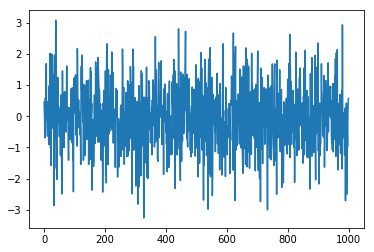

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.random.randn(1000)
plt.plot(x);

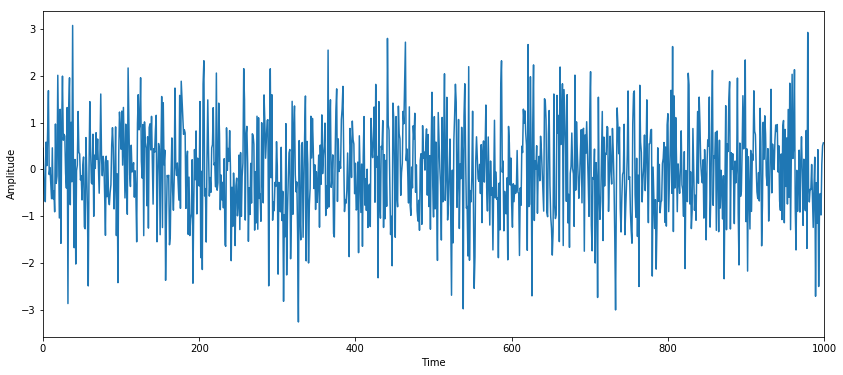

In [31]:
def xplot(x):
    plt.figure(figsize=(14,6))
    plt.plot(x)
    plt.xlim(0, len(x))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

xplot(x)

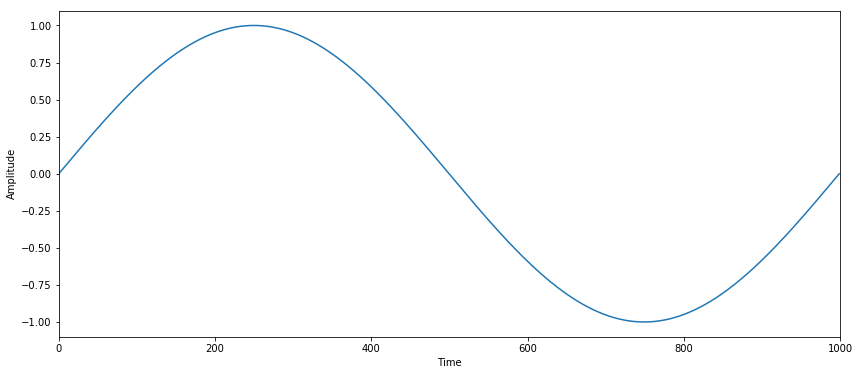

In [33]:
s = np.sin(np.linspace(0, 2*np.pi, len(x)))
xplot(s)

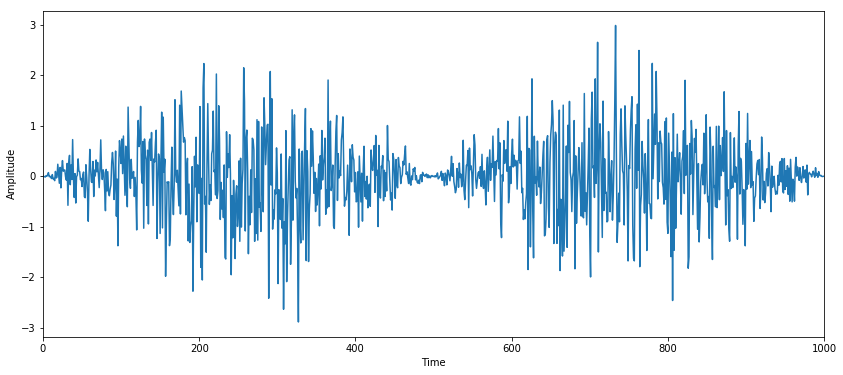

In [35]:
xplot(s * x)

We can do things like find the places where `x > 0`:

In [122]:
x > 0

array([ True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,

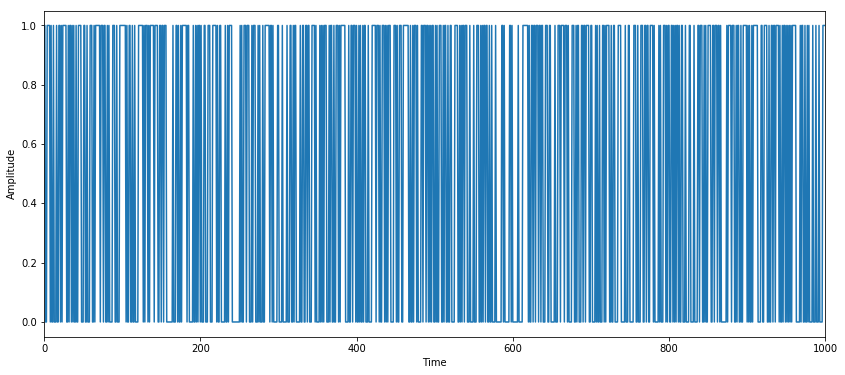

In [123]:
xplot(x > 0)

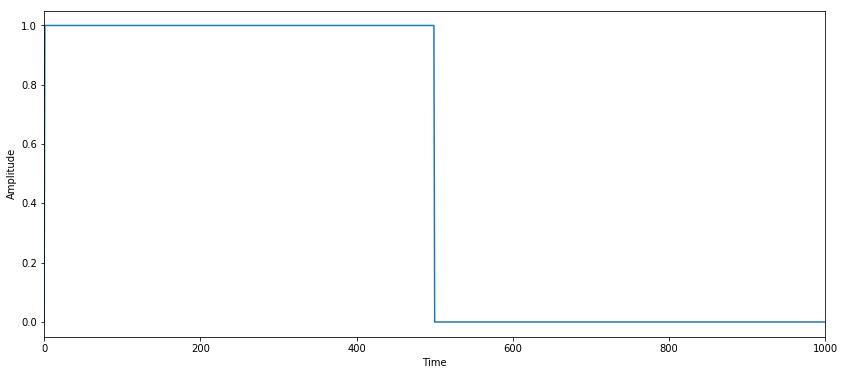

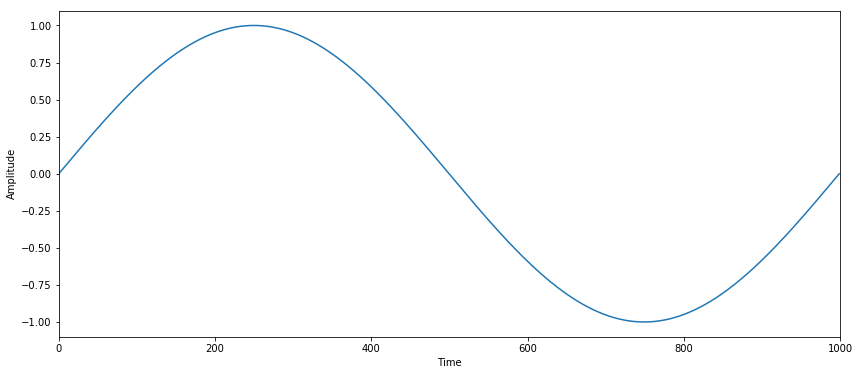

In [131]:
xplot(s > 0)
xplot(s)

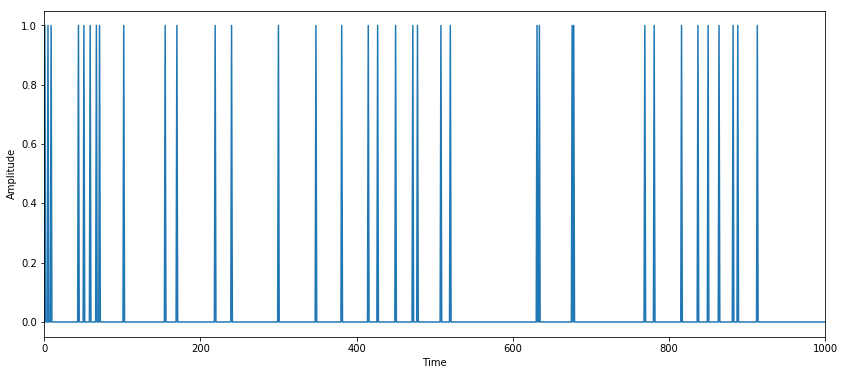

In [150]:
xplot((x > 0) & (x < 0.1))
small_idxs = np.where((x > 0) & (x < 0.1))

In [151]:
# We can even index into x with those indices!
small_values = x[small_idxs]
small_values

array([ 0.04847241,  0.07925263,  0.03750874,  0.09114798,  0.08102085,
        0.03733385,  0.02016801,  0.06621013,  0.09079843,  0.09735442,
        0.03777916,  0.09384829,  0.04654784,  0.07007277,  0.09779742,
        0.02156659,  0.00310792,  0.04346194,  0.00054652,  0.04931876,
        0.09525635,  0.0506778 ,  0.02027082,  0.00762423,  0.03277113,
        0.06588198,  0.02090927,  0.04338164,  0.04829526,  0.0663194 ,
        0.06370569,  0.06619974,  0.05209749,  0.00113861,  0.04821259,
        0.04657211])

# Loading data

Let's download a `.csv` file using `requests`, load it into memory using `numpy`, then plot it using `matplotlib`.

We'll use `requests.get()` to download the file, `open()` and `write()` to write it out to a file, `np.genfromtxt()` to load it in, then `plt.scatter()` to plot it.

In [94]:
import requests
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

# Use requests to download
r = requests.get(url)

# Grab the csv data from r.text
csv_data = r.text

# Write it out to /tmp/iris.csv
with open("/tmp/iris.csv", "w") as f:
    f.write(csv_data)
    
# Print it out so we can see what it looks like
print(csv_data)

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa
5.4,3.7,1.5,0.2,setosa
4.8,3.4,1.6,0.2,setosa
4.8,3,1.4,0.1,setosa
4.3,3,1.1,0.1,setosa
5.8,4,1.2,0.2,setosa
5.7,4.4,1.5,0.4,setosa
5.4,3.9,1.3,0.4,setosa
5.1,3.5,1.4,0.3,setosa
5.7,3.8,1.7,0.3,setosa
5.1,3.8,1.5,0.3,setosa
5.4,3.4,1.7,0.2,setosa
5.1,3.7,1.5,0.4,setosa
4.6,3.6,1,0.2,setosa
5.1,3.3,1.7,0.5,setosa
4.8,3.4,1.9,0.2,setosa
5,3,1.6,0.2,setosa
5,3.4,1.6,0.4,setosa
5.2,3.5,1.5,0.2,setosa
5.2,3.4,1.4,0.2,setosa
4.7,3.2,1.6,0.2,setosa
4.8,3.1,1.6,0.2,setosa
5.4,3.4,1.5,0.4,setosa
5.2,4.1,1.5,0.1,setosa
5.5,4.2,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa
5,3.2,1.2,0.2,setosa
5.5,3.5,1.3,0.2,setosa
4.9,3.1,1.5,0.1,setosa
4.4,3,1.3,0.2,setosa
5.1,3.4,1.5,0.2,setosa
5,3.5,1.3,0.3,setosa
4.5,2.3,1.3,0.3,setosa
4.

In [100]:
# We want to load this into a float array, so we need to convert these label names to a float
label_map = {
    b'setosa': 0.0,
    b'versicolor': 1.0,
    b'virginica': 2.0,
}

# Convert column 4 by taking each entry, and passing it through label_map
converters = {
    4: lambda entry: label_map[entry],
}

iris_data = np.genfromtxt("/tmp/iris.csv", delimiter=',', skip_header=1, converters=converters)
iris_data

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 5. ,  3.4,  1.5,  0.2,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,

In [103]:
iris_data[:, 0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

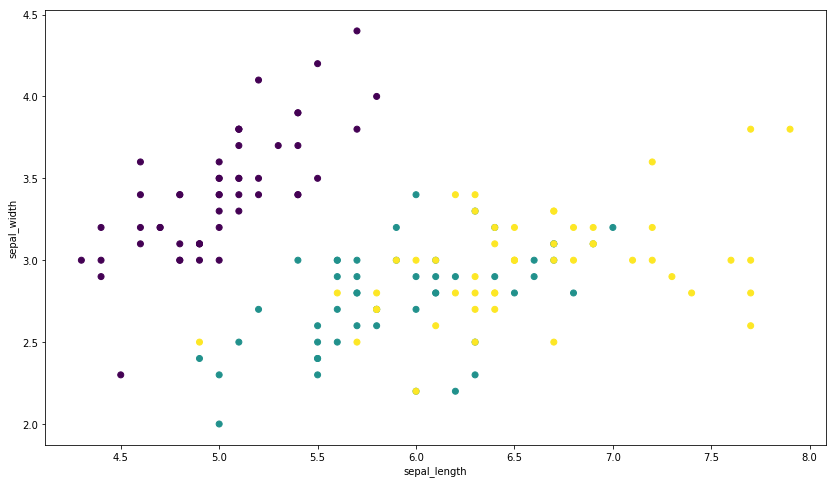

In [114]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_data[:, 4])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

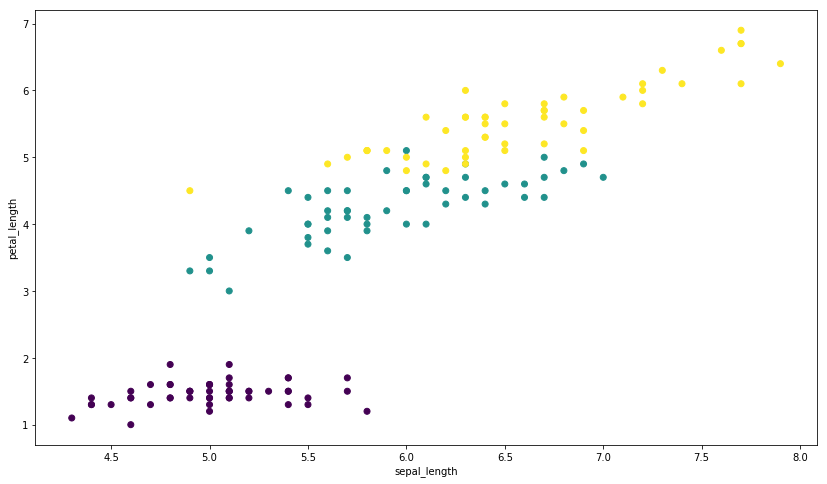

In [115]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 0], iris_data[:, 2], c=iris_data[:, 4])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

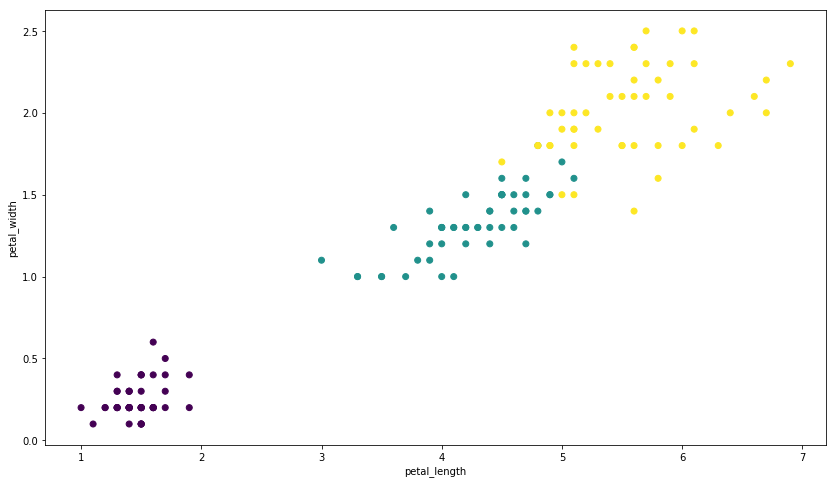

In [118]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 2], iris_data[:, 3], c=iris_data[:, 4])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Check 0

We are going to compute the "centroid" of each type of Iris.  The "centroid" of a blob of data finds the mean value along each axis.  You are then going to scatter plot the data just as above, but you will also plot the calculated centroids along the same two dimensions.  The output should look something like:

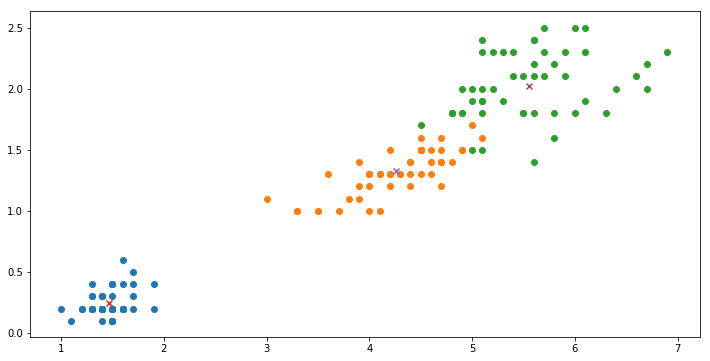

In [185]:
# Example solution



















# Find indices of each iris type's data
setosa_idxs = np.where(iris_data[:, 4] == 0)[0]
versicolor_idxs = np.where(iris_data[:, 4] == 1)[0]
virginica_idxs = np.where(iris_data[:, 4] == 2)[0]

# use indices to isolate just that particular iris' data
setosa_data = iris_data[setosa_idxs, 0:4]
versicolor_data = iris_data[versicolor_idxs, 0:4]
virginica_data = iris_data[virginica_idxs, 0:4]

# Plot it to make sure we're making sense
plt.figure(figsize=(12, 6))
plt.scatter(setosa_data[:, 2], setosa_data[:, 3])
plt.scatter(versicolor_data[:, 2], versicolor_data[:, 3])
plt.scatter(virginica_data[:, 2], virginica_data[:, 3])

# Calculate centroids
setosa_centroid = np.mean(setosa_data, axis=0)
versicolor_centroid = np.mean(versicolor_data, axis=0)
virginica_centroid = np.mean(virginica_data, axis=0)

# Plot centroids
plt.scatter(setosa_centroid[2], setosa_centroid[3], marker='x')
plt.scatter(versicolor_centroid[2], versicolor_centroid[3], marker='x')
plt.scatter(virginica_centroid[2], virginica_centroid[3], marker='x')